# Import Necessary Libraries

In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from sklearn.model_selection import train_test_split
import scipy.stats as stat
from scipy import stats
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Import Data

In [3]:
df=pd.read_csv("C:/Users/HP/Desktop/Vikrant/Bank Churn/Bank Customer Churning.csv")
df

,Cust_id,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of accounts,Cr Card,active member,monthly Salary,Exited
0,1,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,4,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,5,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,709,1,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,772,3,1,42,3,75075.31,2,1,0,92888.52,1


In [14]:
independent_vars = [ 'Gender', 'Geography', 'active member', 'Cr Card']
target_var = 'Exited'


for var in independent_vars:
    contingency_table = pd.crosstab(df[var], df[target_var]) 
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)  
    
    print(f"\nChi-Square Test for {var}:")
    print(f"Chi-Square Statistic: {chi2:}")
    print(f"p-value: {p:}")
   


Chi-Square Test for Gender:
Chi-Square Statistic: 112.91857062096116
p-value: 2.2482100097131755e-26

Chi-Square Test for Geography:
Chi-Square Statistic: 301.25533682434536
p-value: 3.8303176053541544e-66

Chi-Square Test for active member:
Chi-Square Statistic: 243.3038999239534
p-value: 7.48734658958622e-55

Chi-Square Test for Cr Card:
Chi-Square Statistic: 0.47133779904440803
p-value: 0.49237236141554686


In [7]:
# Create a contingency table
contingency_table = pd.crosstab(df['active member'], df['Exited'])
contingency_table

Exited,0,1
active member,,
0,3546,1302
1,4417,735


In [8]:
# Create a contingency table
contingency_table = pd.crosstab(df['Geography'], df['Exited'])
contingency_table

Exited,0,1
Geography,,
1,4204,810
2,2064,413
3,1695,814


In [9]:
# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Exited'])
contingency_table

Exited,0,1
Gender,,
0,3404,1139
1,4559,898


In [10]:
# Create a contingency table
contingency_table = pd.crosstab(df['Cr Card'], df['Exited'])
contingency_table

Exited,0,1
Cr Card,,
0,2332,613
1,5631,1424


In [11]:
dependent_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'Num Of accounts', 'monthly Salary']
target_var = 'Exited'
results = {}
for var in dependent_vars:
    group_0 = df[df[target_var] == 0][var]  
    group_1 = df[df[target_var] == 1][var]  

    stat, p_value = mannwhitneyu(group_0, group_1)
    results[var] = {'U-statistic': stat, 'p-value': p_value}
for var, res in results.items():
    print(f"Variable: {var}")
    print(f"U-statistic: {res['U-statistic']}")
    print(f"p-value: {res['p-value']}")
    print()

Variable: CreditScore
U-statistic: 8381083.0
p-value: 0.01986866117272834

Variable: Age
U-statistic: 4345981.5
p-value: 3.2104014319371675e-230

Variable: Tenure
U-statistic: 8272055.5
p-value: 0.16219376122918827

Variable: Balance
U-statistic: 6849444.5
p-value: 1.1158399379149222e-28

Variable: Num Of accounts
U-statistic: 9390005.5
p-value: 5.275105212817194e-36

Variable: monthly Salary
U-statistic: 7969863.0
p-value: 0.22705150930153783



# Train Test Split

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

X = df[['Age', 'Geography', 'Gender', 'Balance', 'Num Of accounts', 'active member']]
y = df['Exited'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Logistic regression

In [49]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=500, random_state=42)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

classification_rep_lr = classification_report(y_test, y_pred_lr)
print(f"Logistic Regression Classification Report:\n{classification_rep_lr}")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.62      0.18      0.28       407

    accuracy                           0.81      2000
   macro avg       0.72      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



# Neural Network(MLP)

In [42]:
from sklearn.neural_network import MLPClassifier

model_mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
model_mlp.fit(X_train, y_train)
y_pred_mlp = model_mlp.predict(X_test)

classification_rep_mlp = classification_report(y_test, y_pred_mlp)
print(f"MLPClassifier Classification Report:\n{classification_rep_mlp}")

MLPClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.78      0.50      0.61       407

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.77      2000
weighted avg       0.86      0.87      0.86      2000



# Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

rf_report = classification_report(y_test, rf_predictions)
print("\nRandom Forest Classification Report:\n", rf_report)


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      1593
           1       0.63      0.50      0.55       407

    accuracy                           0.84      2000
   macro avg       0.75      0.71      0.73      2000
weighted avg       0.83      0.84      0.83      2000



In [70]:
print("\nModel Hyperparameters:")
params = rf_model.get_params()
for param, value in params.items():
    print(f"{param}: {value}")

num_trees = len(rf_model.estimators_)
print(f"\nNumber of trees in the forest: {num_trees}")

feature_names = list(X.columns) 
print("\nFeature Importances:")
for feature, importance in zip(feature_names, rf_model.feature_importances_):
    print(f"{feature}: {importance:.4f}")


Model Hyperparameters:
bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: auto
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False

Number of trees in the forest: 100

Feature Importances:
Age: 0.3494
Geography: 0.0488
Gender: 0.0204
Balance: 0.3829
Num Of accounts: 0.1499
active member: 0.0486


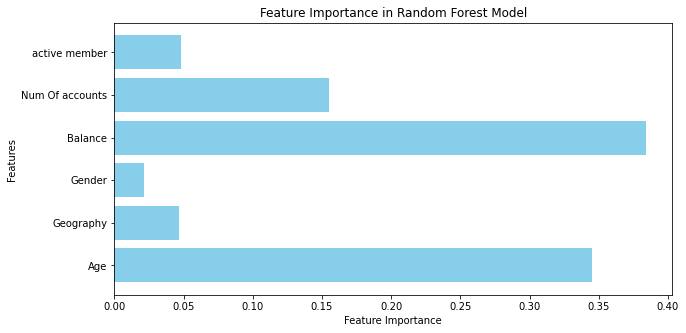

In [69]:
from sklearn.metrics import accuracy_score, classification_report

X = df[['Age', 'Geography', 'Gender', 'Balance', 'Num Of accounts', 'active member']]
y = df['Exited']

feature_importances = rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 5))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.show()


# Naive bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
y_predNB = model_NB.predict(X_test)

classification_rep = classification_report(y_test, y_predNB)
print(f"Naive Bayes Classification Report:\n{classification_rep}")

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1593
           1       0.69      0.29      0.41       407

    accuracy                           0.83      2000
   macro avg       0.77      0.63      0.65      2000
weighted avg       0.81      0.83      0.80      2000



# Support Vector Machine (SVM)

In [63]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

kernels = ['linear', 'rbf',]

for kernel in kernels:
    print(f"\nTraining SVM with {kernel} kernel...")
    
    svm_model = SVC(kernel=kernel, probability=True, random_state=42)
    svm_model.fit(X_train, y_train)

    y_pred = svm_model.predict(X_test)
    y_pred_proba = svm_model.predict_proba(X_test)[:, 1]  

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    class_report = classification_report(y_test, y_pred)
    print("\nClassification Report:\n", class_report)

   


Training SVM with linear kernel...
Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000


Training SVM with rbf kernel...


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      1593
           1       0.84      0.38      0.52       407

    accuracy                           0.86      2000
   macro avg       0.85      0.68      0.72      2000
weighted avg       0.86      0.86      0.84      2000



# CPH Survival Analysis

In [17]:
from lifelines import CoxPHFitter

# Preprocessing: Selecting relevant columns
df_filtered = df.copy()

# Renaming columns to remove spaces
df_filtered.columns = [col.strip().replace(" ", "_") for col in df_filtered.columns]

# Encoding categorical variables (Geography and Gender)
df_filtered['Gender'] = df_filtered['Gender'].astype(int)
df_filtered['Geography'] = df_filtered['Geography'].astype(int)

# Selecting features and target
features = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 
            'Num_Of_accounts', 'Cr_Card', 'active_member', 'monthly_Salary']
df_filtered = df_filtered[['Exited'] + features]

# Fitting the Cox Proportional Hazards Model
cox_model = CoxPHFitter()
cox_model.fit(df_filtered, duration_col='Age', event_col='Exited')

# Display summary of the model
cox_summary = cox_model.summary
cox_summary



,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
CreditScore,-2.967581e-04,0.999703,2.216851e-04,-7.312529e-04,0.000138,0.999269,1.000138,0.0,-1.338647,1.806855e-01,2.468447
Geography,1.738470e-01,1.189873,2.747426e-02,1.199984e-01,0.227696,1.127495,1.255703,0.0,6.327632,2.489525e-10,31.903410
Gender,-2.791331e-01,0.756439,4.481231e-02,-3.669636e-01,-0.191303,0.692835,0.825883,0.0,-6.228938,4.696065e-10,30.987829
Tenure,-1.050413e-02,0.989551,7.592944e-03,-2.538602e-02,0.004378,0.974933,1.004387,0.0,-1.383407,1.665403e-01,2.586057
Balance,2.004132e-06,1.000002,4.195558e-07,1.181818e-06,0.000003,1.000001,1.000003,0.0,4.776795,1.781111e-06,19.098791
Num_Of_accounts,-9.665240e-03,0.990381,3.479340e-02,-7.785904e-02,0.058529,0.925095,1.060275,0.0,-0.277789,7.811740e-01,0.356284
Cr_Card,-2.094807e-02,0.979270,4.838622e-02,-1.157833e-01,0.073887,0.890668,1.076685,0.0,-0.432935,6.650622e-01,0.588439
active_member,-1.018756e+00,0.361044,4.775370e-02,-1.112351e+00,-0.925160,0.328785,0.396468,0.0,-21.333540,5.544870e-101,333.043584
monthly_Salary,4.019999e-07,1.000000,3.845472e-07,-3.516988e-07,0.000001,1.000000,1.000001,0.0,1.045385,2.958450e-01,1.757087


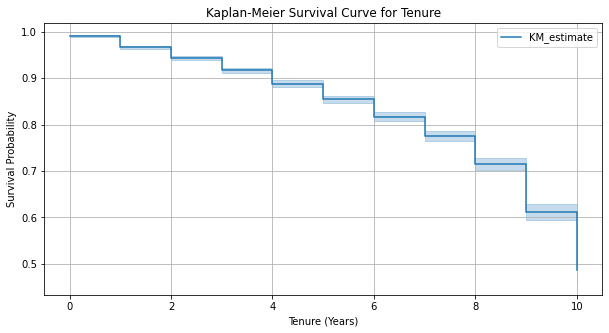

          KM_estimate
timeline             
0.0          0.990500
1.0          0.966530
2.0          0.943814
3.0          0.917024
4.0          0.888362
5.0          0.854641
6.0          0.817367
7.0          0.776348
8.0          0.715148
9.0          0.611805
10.0         0.485699


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

df.columns = [col.strip().replace(" ", "_") for col in df.columns]

T = df['Tenure'] 
E = df['Exited']  

kmf = KaplanMeierFitter()
kmf.fit(durations=T, event_observed=E)

plt.figure(figsize=(10, 5))
kmf.plot_survival_function()
plt.title("Kaplan-Meier Survival Curve for Tenure")
plt.xlabel("Tenure (Years)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.show()

print(kmf.survival_function_)


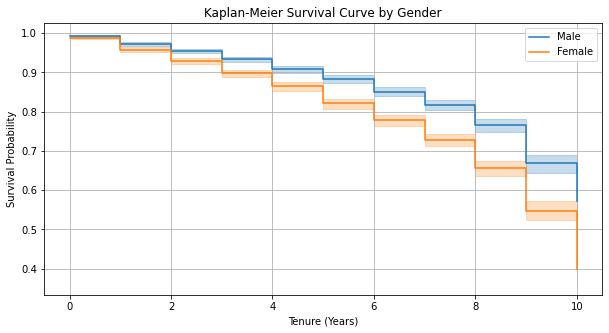

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

df.columns = [col.strip().replace(" ", "_") for col in df.columns]

T = df["Tenure"] 
E = df["Exited"] 
gender_groups = df["Gender"] 

kmf_male = KaplanMeierFitter()
kmf_female = KaplanMeierFitter()

kmf_male.fit(T[gender_groups == 1], event_observed=E[gender_groups == 1], label="Male")
kmf_female.fit(T[gender_groups == 0], event_observed=E[gender_groups == 0], label="Female")

plt.figure(figsize=(10, 5))
kmf_male.plot_survival_function()
kmf_female.plot_survival_function()
plt.title("Kaplan-Meier Survival Curve by Gender")
plt.xlabel("Tenure (Years)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.legend()
plt.show()


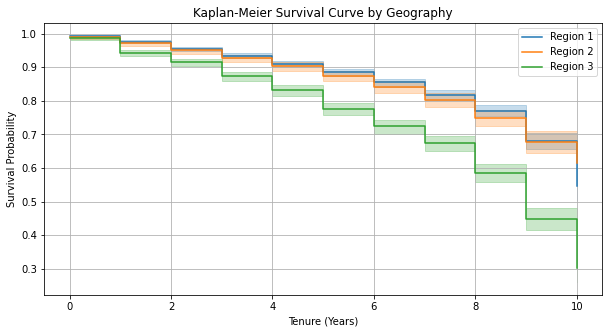

Log-Rank Test between Region 1 and Region 2: p-value = 0.5693935019101075
Log-Rank Test between Region 1 and Region 3: p-value = 8.598549550292517e-48
Log-Rank Test between Region 2 and Region 3: p-value = 7.592865051385399e-30


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

df.columns = [col.strip().replace(" ", "_") for col in df.columns]

T = df["Tenure"]  
E = df["Exited"]  
geography_groups = df["Geography"]  

kmf_geo_1 = KaplanMeierFitter()
kmf_geo_2 = KaplanMeierFitter()
kmf_geo_3 = KaplanMeierFitter()

kmf_geo_1.fit(T[geography_groups == 1], event_observed=E[geography_groups == 1], label="Region 1")
kmf_geo_2.fit(T[geography_groups == 2], event_observed=E[geography_groups == 2], label="Region 2")
kmf_geo_3.fit(T[geography_groups == 3], event_observed=E[geography_groups == 3], label="Region 3")

plt.figure(figsize=(10, 5))
kmf_geo_1.plot_survival_function()
kmf_geo_2.plot_survival_function()
kmf_geo_3.plot_survival_function()

plt.title("Kaplan-Meier Survival Curve by Geography")
plt.xlabel("Tenure (Years)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.legend()
plt.show()

logrank_result = logrank_test(
    T[geography_groups == 1], T[geography_groups == 2], 
    event_observed_A=E[geography_groups == 1], event_observed_B=E[geography_groups == 2]
)
print("Log-Rank Test between Region 1 and Region 2: p-value =", logrank_result.p_value)

logrank_result = logrank_test(
    T[geography_groups == 1], T[geography_groups == 3], 
    event_observed_A=E[geography_groups == 1], event_observed_B=E[geography_groups == 3]
)
print("Log-Rank Test between Region 1 and Region 3: p-value =", logrank_result.p_value)

logrank_result = logrank_test(
    T[geography_groups == 2], T[geography_groups == 3], 
    event_observed_A=E[geography_groups == 2], event_observed_B=E[geography_groups == 3]
)
print("Log-Rank Test between Region 2 and Region 3: p-value =", logrank_result.p_value)
